In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('Placement_Data_Full_Class.csv')

print(df.head())
print(df.info())


   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column       

In [3]:
# Check missing values
print(df.isna().sum())

# Salary will be NaN for not placed students (this is normal)


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


status
Placed        148
Not Placed     67
Name: count, dtype: int64


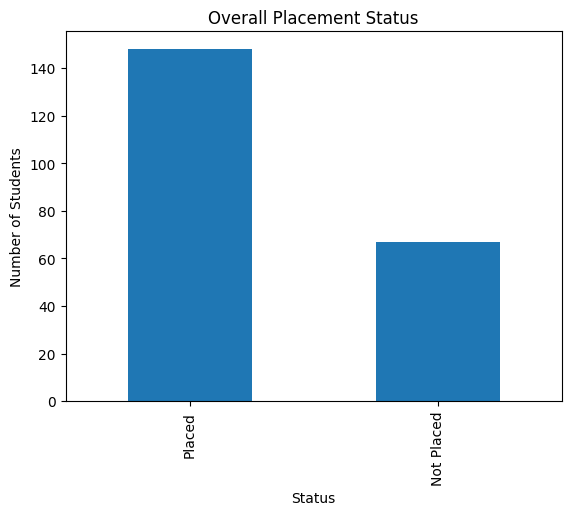

In [4]:
placement_counts = df['status'].value_counts()
print(placement_counts)

plt.figure()
placement_counts.plot(kind='bar')
plt.title('Overall Placement Status')
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.show()


status  Not Placed  Placed
gender                    
F               28      48
M               39     100


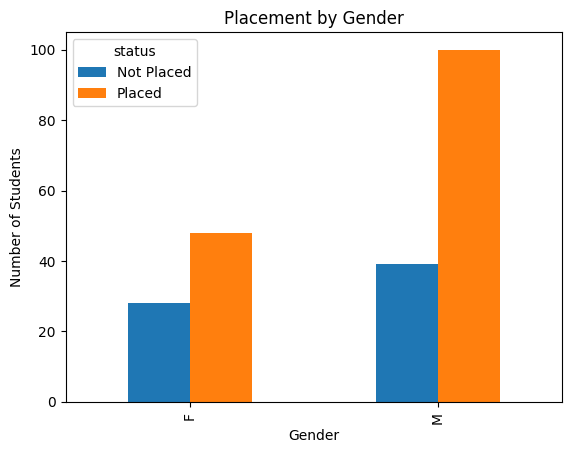

In [5]:
gender_placement = pd.crosstab(df['gender'], df['status'])
print(gender_placement)

gender_placement.plot(kind='bar')
plt.title('Placement by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()


status  Not Placed  Placed
gender                    
F               28      48
M               39     100


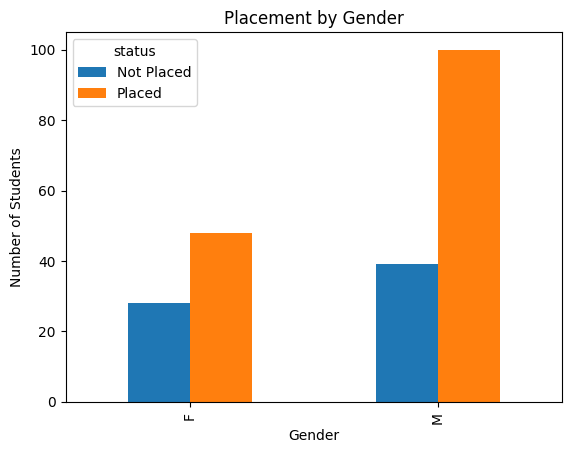

In [6]:
gender_placement = pd.crosstab(df['gender'], df['status'])
print(gender_placement)

gender_placement.plot(kind='bar')
plt.title('Placement by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()


status  Not Placed  Placed
workex                    
No              57      84
Yes             10      64


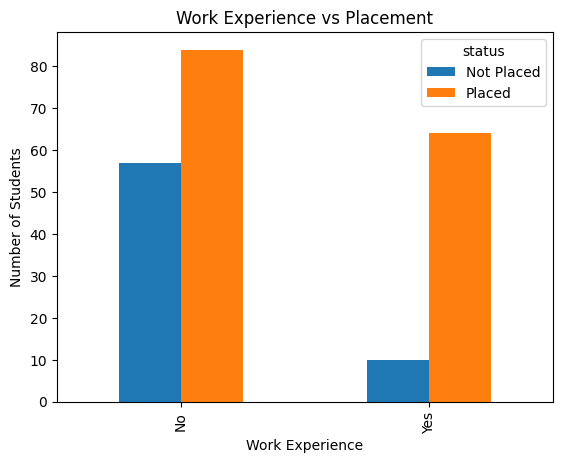

In [7]:
workex_placement = pd.crosstab(df['workex'], df['status'])
print(workex_placement)

workex_placement.plot(kind='bar')
plt.title('Work Experience vs Placement')
plt.xlabel('Work Experience')
plt.ylabel('Number of Students')
plt.show()

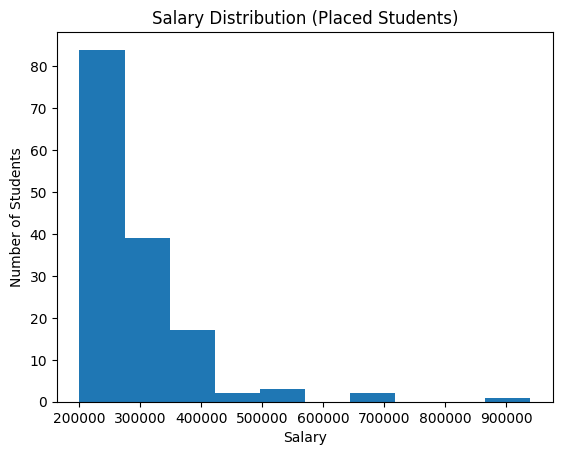

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64


In [8]:
placed_df = df[df['status'] == 'Placed']

plt.figure()
plt.hist(placed_df['salary'], bins=10)
plt.title('Salary Distribution (Placed Students)')
plt.xlabel('Salary')
plt.ylabel('Number of Students')
plt.show()

print(placed_df['salary'].describe())


In [9]:
df['eligible'] = np.where(
    (df['ssc_p'] >= 60) &
    (df['hsc_p'] >= 60) &
    (df['degree_p'] >= 60) &
    (df['mba_p'] >= 60),
    'Eligible',
    'Not Eligible'
)

print(df[['ssc_p','hsc_p','degree_p','mba_p','eligible']].head())


   ssc_p  hsc_p  degree_p  mba_p      eligible
0  67.00  91.00     58.00  58.80  Not Eligible
1  79.33  78.33     77.48  66.28      Eligible
2  65.00  68.00     64.00  57.80  Not Eligible
3  56.00  52.00     52.00  59.43  Not Eligible
4  85.80  73.60     73.30  55.50  Not Eligible


status        Not Placed  Placed
eligible                        
Eligible              18      83
Not Eligible          49      65


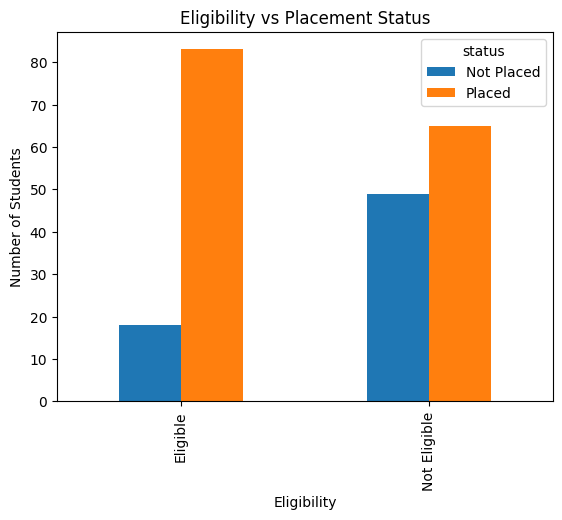

In [10]:
eligibility_vs_placement = pd.crosstab(df['eligible'], df['status'])
print(eligibility_vs_placement)

eligibility_vs_placement.plot(kind='bar')
plt.title('Eligibility vs Placement Status')
plt.xlabel('Eligibility')
plt.ylabel('Number of Students')
plt.show()


In [11]:
eligible_df = df[df['eligible'] == 'Eligible']

success_rate = (eligible_df['status'] == 'Placed').mean() * 100

print("Eligible Students Count:", len(eligible_df))
print("Eligible Placement Success Rate (%):", round(success_rate, 2))


Eligible Students Count: 101
Eligible Placement Success Rate (%): 82.18


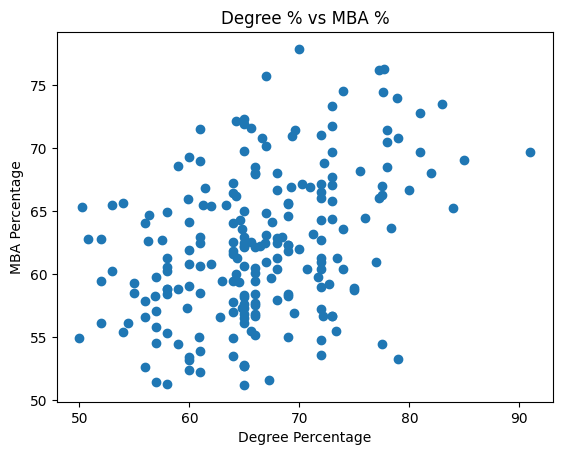

In [12]:
plt.figure()
plt.scatter(df['degree_p'], df['mba_p'])
plt.title('Degree % vs MBA %')
plt.xlabel('Degree Percentage')
plt.ylabel('MBA Percentage')
plt.show()

In [13]:
print("FINAL INSIGHTS:")
print("1. Placement trends vary by specialization and work experience.")
print("2. Eligibility rules clearly separate high-probability candidates.")
print("3. Eligible students have a much higher placement success rate.")
print("4. This system can help T&P cells identify students needing improvement.")


FINAL INSIGHTS:
1. Placement trends vary by specialization and work experience.
2. Eligibility rules clearly separate high-probability candidates.
3. Eligible students have a much higher placement success rate.
4. This system can help T&P cells identify students needing improvement.
